<a href="https://colab.research.google.com/github/Dogechi/W4_hypothesis-testing/blob/master/Daniel_Ogechi_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Blue cars Hypothesis Testing


We going to invistigate the mean difference of the taken blue car electric cars between two different postal codes. The assumption is the the mean difference between Bluecars picked on weekdays is the same in each postal code. 

H0: (μ1=μ2)

H1: (μ1≠μ2)

We going to invistigate two randomly selected postal codes from our sample population that we shall choose from the main population. 


Confidence interval = 95%
level of significance = 5%

If the p_value obtained from the sample size is less than our level of significance which is 0.05, fail to accept the null hypothesis as there will be enough evidence that there is a significance difference between the means and accept the alternative.

In [0]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

import seaborn as sns
# Importing the numpy library
#
import numpy as np

# importing matplotlib
import matplotlib.pyplot as plt

# importing pandas profiling
import pandas_profiling as pp

In [2]:
#Loading the data

autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
# We count the number of non - missing values in the df dataframe
#
autolib.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [4]:
np.count_nonzero(autolib.isnull())

0

There are no missing values in our dataset, thus no need to do further exploration on null values.

In [5]:
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [6]:
# since we interested in the Bluecars, we will drop the other columns

cols = ['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum','Slots_freed_sum', 'Slots_taken_sum']
   
autolib = autolib[cols]
autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,0,0


In [7]:
# standardizing the columns 
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [8]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 9 columns):
postal_code              16085 non-null int64
date                     16085 non-null object
n_daily_data_points      16085 non-null int64
dayofweek                16085 non-null int64
day_type                 16085 non-null object
bluecars_taken_sum       16085 non-null int64
bluecars_returned_sum    16085 non-null int64
slots_freed_sum          16085 non-null int64
slots_taken_sum          16085 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.1+ MB


# Stratified Sampling

To conduct the test, we going to need a random sample from the whole population. Using the parameters above and Cochran’s formula, the required sample size needed equates to 29, which in this case equates to 0.2(frac of the total population) further analysis can be found [here](https://docs.google.com/document/d/1H7JCnV0u6URB_hYfP-BND11qPo57OOkDhvfPbKMKTi0/edit?usp=sharing)

In [36]:
#random Stratified sampling 
autolib_strat = autolib.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))
print(autolib_strat['postal_code'].value_counts())



94160    31
94150    31
75116    31
95870    31
95880    31
         ..
93440    30
93370    30
92340    29
93200    25
93390    17
Name: postal_code, Length: 104, dtype: int64


In [37]:
autolib_strat

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
42,75001,2/12/2018,1440,0,weekday,115,111,18,19
113,75001,4/27/2018,1440,4,weekday,102,102,20,20
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
139,75001,6/3/2018,1440,6,weekend,196,199,24,24
13,75001,1/14/2018,1440,6,weekend,193,193,22,20
...,...,...,...,...,...,...,...,...,...
15941,95880,1/13/2018,1440,5,weekend,25,26,0,0
16039,95880,4/24/2018,1439,1,weekday,17,19,0,0
16000,95880,3/16/2018,1440,4,weekday,9,8,0,0
16037,95880,4/22/2018,1440,6,weekend,19,18,0,0


# EDA Analysis

In [41]:
pp.ProfileReport(autolib_strat)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,3199
Total Missing (%),0.0%
Total size in memory,250.0 KiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [42]:
# Check the distribution of cars within the weekdays
autolib_strat1 = autolib_strat['day_type']=='weekday'
autolib_strat2 = autolib_strat[autolib_strat1]
autolib_strat2

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
42,75001,2/12/2018,1440,0,weekday,115,111,18,19
113,75001,4/27/2018,1440,4,weekday,102,102,20,20
8,75001,1/9/2018,1439,1,weekday,81,84,15,15
151,75001,6/15/2018,1440,4,weekday,150,150,20,22
85,75001,3/30/2018,1434,4,weekday,126,128,25,23
...,...,...,...,...,...,...,...,...,...
15957,95880,1/29/2018,1440,0,weekday,5,8,0,0
16027,95880,4/12/2018,1440,3,weekday,8,11,0,0
16057,95880,5/23/2018,1174,2,weekday,14,12,0,0
16039,95880,4/24/2018,1439,1,weekday,17,19,0,0


In [43]:
day_dist = autolib_strat2.groupby('dayofweek').size()
day_dist


dayofweek
0    456
1    447
2    460
3    478
4    465
dtype: int64

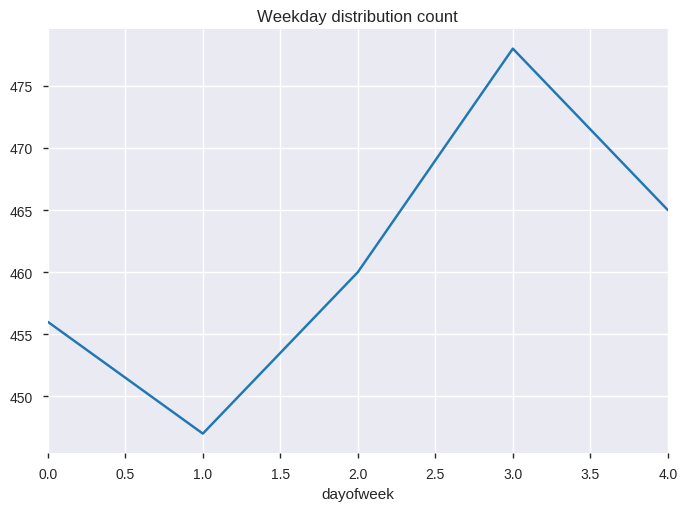

In [44]:
day_dist.plot(title='Weekday distribution count')

# Observation

We can see that most blue cars were taken on Monday and Thursday mostly.

In [45]:
# Select all numerical variables
autolib_num = autolib_strat2.select_dtypes(include=['float64','int64'])
autolib_num

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
42,75001,1440,0,115,111,18,19
113,75001,1440,4,102,102,20,20
8,75001,1439,1,81,84,15,15
151,75001,1440,4,150,150,20,22
85,75001,1434,4,126,128,25,23
...,...,...,...,...,...,...,...
15957,95880,1440,0,5,8,0,0
16027,95880,1440,3,8,11,0,0
16057,95880,1174,2,14,12,0,0
16039,95880,1439,1,17,19,0,0


# Bivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53db7a3438>,
      dtype=object)

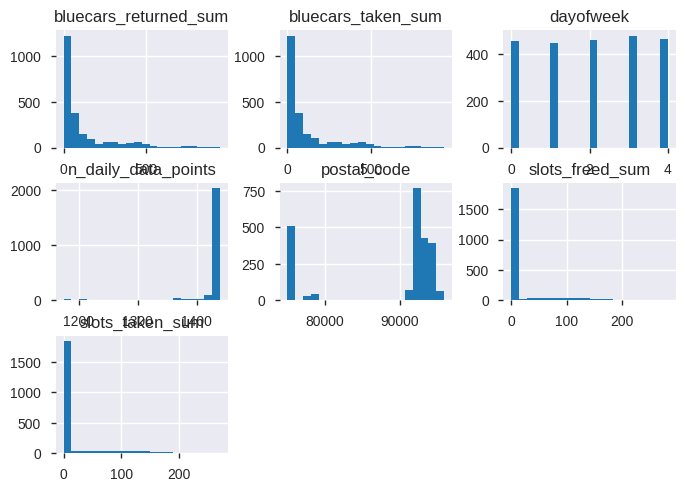

In [46]:
autolib_num.hist(bins=20)

In [47]:
# correlation with the variable
autolib_corr = autolib_num.corr()['bluecars_taken_sum'][:-1]
autolib_corr

postal_code             -0.714066
n_daily_data_points     -0.021226
dayofweek                0.046215
bluecars_taken_sum       1.000000
bluecars_returned_sum    0.998675
slots_freed_sum          0.948885
Name: bluecars_taken_sum, dtype: float64

# Observation

From the correlation report, we can see that the sum of blue cars taken is highly correlated with the returned sum, and the slots freed but a negative correlation with the postal codes of the area.

More of the analysis is presented below in graph form.

# Multivariate analysis

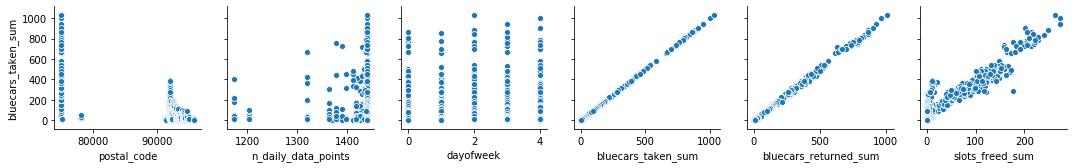

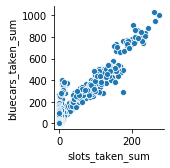

In [17]:
# Correlation plots using pairplot

for i in range(0,len(autolib_num.columns),6):
  sns.pairplot(autolib_num,y_vars=['bluecars_taken_sum'],x_vars=autolib_num.columns[i:i+6])


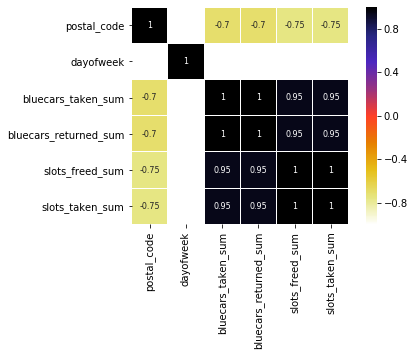

In [18]:
# plotting significant correlation in one plot(heatmap)
corr = autolib_num.drop('n_daily_data_points',axis=1).corr()
sns.heatmap(corr[(corr>=0.5)| (corr <= -0.4)],
            cmap='CMRmap_r',vmax=1.0,vmin=-1.0,linewidths=0.1,
            annot=True, annot_kws={'size':8},square=True);

In [19]:
autolib_strat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 102 to 16054
Data columns (total 9 columns):
postal_code              1648 non-null int64
date                     1648 non-null object
n_daily_data_points      1648 non-null int64
dayofweek                1648 non-null int64
day_type                 1648 non-null object
bluecars_taken_sum       1648 non-null int64
bluecars_returned_sum    1648 non-null int64
slots_freed_sum          1648 non-null int64
slots_taken_sum          1648 non-null int64
dtypes: int64(7), object(2)
memory usage: 128.8+ KB


# Choosing postal codes of interest from the sample

We going to invistigate if the mean samples are the same across the postal codes, thus we going to randomly select to postal codes for invistigation.

In [48]:
autolib_strat['postal_code'].sample(n=2)


7271    92290
4284    91400
Name: postal_code, dtype: int64

In [49]:
autolib_rand_1 = autolib_strat[(autolib.postal_code == 92290)]
autolib_rand_1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
7190,92290,1/18/2018,1439,3,weekday,14,10,0,0
7315,92290,6/6/2018,1440,2,weekday,12,7,0,0
7191,92290,1/19/2018,1440,4,weekday,12,18,0,0
7220,92290,2/17/2018,1440,5,weekend,15,14,0,0
7269,92290,4/10/2018,1440,1,weekday,9,9,0,0
7273,92290,4/14/2018,1440,5,weekend,20,18,0,0
7284,92290,4/25/2018,1440,2,weekday,9,8,0,0
7276,92290,4/17/2018,1440,1,weekday,12,9,0,0
7285,92290,4/26/2018,1440,3,weekday,4,5,0,0
7270,92290,4/11/2018,1439,2,weekday,5,5,0,0


In [50]:
# Since we focused of the distribution across the weekdays, we going to filter out the weekends 

autolib_1 = autolib_rand_1['day_type']=='weekday'
autolib_1b = autolib_rand_1[autolib_1]
autolib_1b  


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
7190,92290,1/18/2018,1439,3,weekday,14,10,0,0
7315,92290,6/6/2018,1440,2,weekday,12,7,0,0
7191,92290,1/19/2018,1440,4,weekday,12,18,0,0
7269,92290,4/10/2018,1440,1,weekday,9,9,0,0
7284,92290,4/25/2018,1440,2,weekday,9,8,0,0
7276,92290,4/17/2018,1440,1,weekday,12,9,0,0
7285,92290,4/26/2018,1440,3,weekday,4,5,0,0
7270,92290,4/11/2018,1439,2,weekday,5,5,0,0
7290,92290,5/1/2018,1440,1,weekday,21,17,0,0
7174,92290,1/2/2018,1438,1,weekday,12,17,0,0


In [51]:
#Selecting numerical variables for further analysis for mean, median and the sd

autolib_1c = autolib_1b.select_dtypes(include=['float64','int64'])
autolib_1c


,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
7190,92290,1439,3,14,10,0,0
7315,92290,1440,2,12,7,0,0
7191,92290,1440,4,12,18,0,0
7269,92290,1440,1,9,9,0,0
7284,92290,1440,2,9,8,0,0
7276,92290,1440,1,12,9,0,0
7285,92290,1440,3,4,5,0,0
7270,92290,1439,2,5,5,0,0
7290,92290,1440,1,21,17,0,0
7174,92290,1438,1,12,17,0,0


In [53]:
autolib_1c.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,22.0,22.000000,22.000000,22.000000,22.000000,22.0,22.0
mean,92290.0,1435.045455,2.090909,10.863636,11.636364,0.0,0.0
std,0.0,15.338955,1.269011,4.528171,5.019443,0.0,0.0
min,92290.0,1370.000000,0.000000,0.000000,2.000000,0.0,0.0
25%,92290.0,1438.250000,1.000000,9.000000,8.250000,0.0,0.0
50%,92290.0,1440.000000,2.000000,11.000000,10.500000,0.0,0.0
75%,92290.0,1440.000000,3.000000,12.750000,16.750000,0.0,0.0
max,92290.0,1440.000000,4.000000,21.000000,19.000000,0.0,0.0


Sample entries = 22

mean = 10

std = 4.52

In [54]:
#Selecting the second postal code that was chosen randomly.

autolib_rand_2 = autolib_strat[(autolib.postal_code == 91400)]
autolib_rand_2



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4356,91400,6/9/2018,1440,5,weekend,13,11,0,0
4361,91400,6/14/2018,1439,3,weekday,4,5,0,0
4363,91400,6/16/2018,1440,5,weekend,9,10,0,0
4289,91400,3/23/2018,1440,4,weekday,13,10,0,0
4213,91400,1/3/2018,1439,2,weekday,0,3,0,0
4243,91400,2/2/2018,1440,4,weekday,13,9,0,0
4273,91400,3/7/2018,1440,2,weekday,7,8,0,0
4284,91400,3/18/2018,1440,6,weekend,10,12,0,0
4355,91400,6/8/2018,1438,4,weekday,5,7,0,0
4216,91400,1/6/2018,1437,5,weekend,3,2,0,0


In [55]:
#Focusing our study on the weekday only

autolib_2 = autolib_rand_2['day_type']=='weekday'
autolib_2b = autolib_rand_2[autolib_2]
autolib_2b


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4361,91400,6/14/2018,1439,3,weekday,4,5,0,0
4289,91400,3/23/2018,1440,4,weekday,13,10,0,0
4213,91400,1/3/2018,1439,2,weekday,0,3,0,0
4243,91400,2/2/2018,1440,4,weekday,13,9,0,0
4273,91400,3/7/2018,1440,2,weekday,7,8,0,0
4355,91400,6/8/2018,1438,4,weekday,5,7,0,0
4227,91400,1/17/2018,1440,2,weekday,11,14,0,0
4281,91400,3/15/2018,1440,3,weekday,6,8,0,0
4262,91400,2/21/2018,1440,2,weekday,8,7,0,0
4263,91400,2/22/2018,1440,3,weekday,6,8,0,0


In [56]:
#We isolate the numerical variables in order to conduct the mean mode and median for each sample. 
#helpful when conducting various tests if required such as the z-score

autolib_2c = autolib_2b.select_dtypes(include=['float64','int64'])
autolib_2c


,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4361,91400,1439,3,4,5,0,0
4289,91400,1440,4,13,10,0,0
4213,91400,1439,2,0,3,0,0
4243,91400,1440,4,13,9,0,0
4273,91400,1440,2,7,8,0,0
4355,91400,1438,4,5,7,0,0
4227,91400,1440,2,11,14,0,0
4281,91400,1440,3,6,8,0,0
4262,91400,1440,2,8,7,0,0
4263,91400,1440,3,6,8,0,0


In [57]:
autolib_2c.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,21.0,21.000000,21.000000,21.000000,21.000000,21.0,21.0
mean,91400.0,1438.238095,2.380952,8.000000,8.428571,0.0,0.0
std,0.0,5.058703,1.359272,3.847077,3.571714,0.0,0.0
min,91400.0,1417.000000,0.000000,0.000000,3.000000,0.0,0.0
25%,91400.0,1439.000000,2.000000,6.000000,5.000000,0.0,0.0
50%,91400.0,1440.000000,3.000000,8.000000,8.000000,0.0,0.0
75%,91400.0,1440.000000,3.000000,11.000000,11.000000,0.0,0.0
max,91400.0,1440.000000,4.000000,15.000000,14.000000,0.0,0.0


Sample we have is = 21 entries

Mean for the blue_cars taken = 8

Std = 3.85

# T-test

Since our sample size is less than 30, we going to conduct a ttest for our sample population and compare our results our previously set metrics. 




In [58]:
# importing stats
from scipy.stats import ttest_ind
# from statsmodels.stats.weightstats import ttest_ind 

ttest = ttest_ind(autolib_1c['bluecars_taken_sum'],autolib_2c['bluecars_taken_sum'])
ttest

Ttest_indResult(statistic=2.229726405908069, pvalue=0.03130306327037721)

The standard Deviation is = 2.23

P_value = 0.0313

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis and fail to reject the alternative.

The test clearly shows that we have strong evidence against the null hypothesis that states there is no difference between the means of the blue electric cars picked in the postal codes. More on the [analysis](https://docs.google.com/document/d/1H7JCnV0u6URB_hYfP-BND11qPo57OOkDhvfPbKMKTi0/edit?usp=sharing)